<a href="https://colab.research.google.com/github/SaurabhSRP/Stroke-Prediction/blob/main/Stroke_Prediction_(Logistic_Regression_and_Random_forest_IMBALANCE_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1) Importing libraries and loading dataset**

In [ ]:
##Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/SaurabhSRP/Stroke-Prediction/main/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

##Attribute Information
**1) id**: unique identifier

**2) gender**: "Male", "Female" or "Other"

**3) age**: age of the patient

**4) hypertension**: 0 if the patient doesn't have hypertension, 1 if the 
patient has hypertension

**5) heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

**6) ever_married**: "No" or "Yes"

**7) work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

**8) Residence_type**: "Rural" or "Urban"

**9) avg_glucose_level**: average glucose level in blood

**10) bmi**: body mass index

**11) smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*

**12) stroke**: 1 if the patient had a stroke or 0 if not

***Note**: "Unknown" in smoking_status means that the information is unavailable for this patient

In [ ]:
df.shape

(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#We dont need the ID column so lets drop it
df.drop('id',axis=1,inplace=True)


In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

This is a **HIGHLY IMBALANCED** dataset , but as i am planning on using logistic Regression which is sensitive to imbalanced dataset i will perform over sampling before applying the algorithm 

Just a suggestion- if you encounter imbalanced data you can proceed on using ensemble techniques or algorithms which are based on decision trees , as these are not that sensitive to imbalanced data . let me know your thoughts on this topic in the comments sections.

#**2) Checking for null value**

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The BMI feature tends to have some null value, there are two approaches either i could just drop the rows with null values or fill the null values with a median value of the bmi feature.

if your approach is to drop the null values, i would prefer to see the counts of stroke w.r.t bmi so that we dont encounter loss of data as dataset is already imbalanced and no. of person who had stroke is very less. By this i mean if the rows with null values had majority of data of the people who had stroke and if we drop them , we would lose a very valuable data regarding our output feature

In [ ]:
print(df[df['bmi'].isnull()]['stroke'].value_counts())

0    161
1     40
Name: stroke, dtype: int64


As we can observe here we have 201 Null bmi values , out of which 40 had got stroke and 161 didnt get stroke. losing 40 counts of stroke data from 249 people who encountered stroke will ruin our dataset. so lets take another approach i.e by filling the null values with median value of BMI


In [ ]:
df.groupby('gender')['bmi'].median()

gender
Female    27.8
Male      28.4
Other     22.4
Name: bmi, dtype: float64

In [ ]:
age_group=[]
for i in df['age']:
  if i<=5.0:
    age_group.append('Kid')
  elif i>5.0 and i<20.0:
    age_group.append('Teen')
  elif i>=20.0 and i<60:
    age_group.append('Adult')
  else:
    age_group.append('Senior')


In [ ]:
df['age_group']=age_group

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [ ]:
df.groupby('age_group')['bmi'].median()

age_group
Adult     29.3
Kid       18.2
Senior    29.2
Teen      22.4
Name: bmi, dtype: float64

In [ ]:
median_bmi=pd.DataFrame(df.groupby('age_group')['bmi'].median())

In [ ]:
median_bmi_list=[]
for i in range(0,4):
  median_bmi_list.append(median_bmi['bmi'][i])

In [ ]:
median_bmi_list[0]

29.3

In [ ]:
def impute_bmi(cols):
    bmi = cols[0]
    age_group = cols[1]
    if pd.isnull(bmi):
        if age_group == 'Senior':
          return 29.2
        elif age_group == 'Adult':
          return 29.3
        elif age_group == 'Teen':
          return 22.4
        else:
          return 18.2
    else:
        return bmi


In [ ]:
df['bmi']=df[['bmi','age_group']].apply(impute_bmi,axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.2,never smoked,1,Senior
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64

#**3)EDA**

###**3.1) Categorical features**

In [ ]:
df.drop('age_group',axis=1,inplace=True)

In [ ]:
categorical_feature=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

In [ ]:
df[categorical_feature]

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,Male,0,1,Yes,Private,Urban,formerly smoked
1,Female,0,0,Yes,Self-employed,Rural,never smoked
2,Male,0,1,Yes,Private,Rural,never smoked
3,Female,0,0,Yes,Private,Urban,smokes
4,Female,1,0,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...,...,...
5105,Female,1,0,Yes,Private,Urban,never smoked
5106,Female,0,0,Yes,Self-employed,Urban,never smoked
5107,Female,0,0,Yes,Self-employed,Rural,never smoked
5108,Male,0,0,Yes,Private,Rural,formerly smoked


A quick observation i encountered while i have observing the countplot of data i.e there is only one row which has gender as 'Others' we are going to drop it along with dropping the column which we recently created for imputting nan values i.e Age_group

In [ ]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
##We have only one input of 'OTHER' category in our data, i will just drop it
df.drop(df.loc[df['gender']=='Other'].index,inplace=True)

In [ ]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

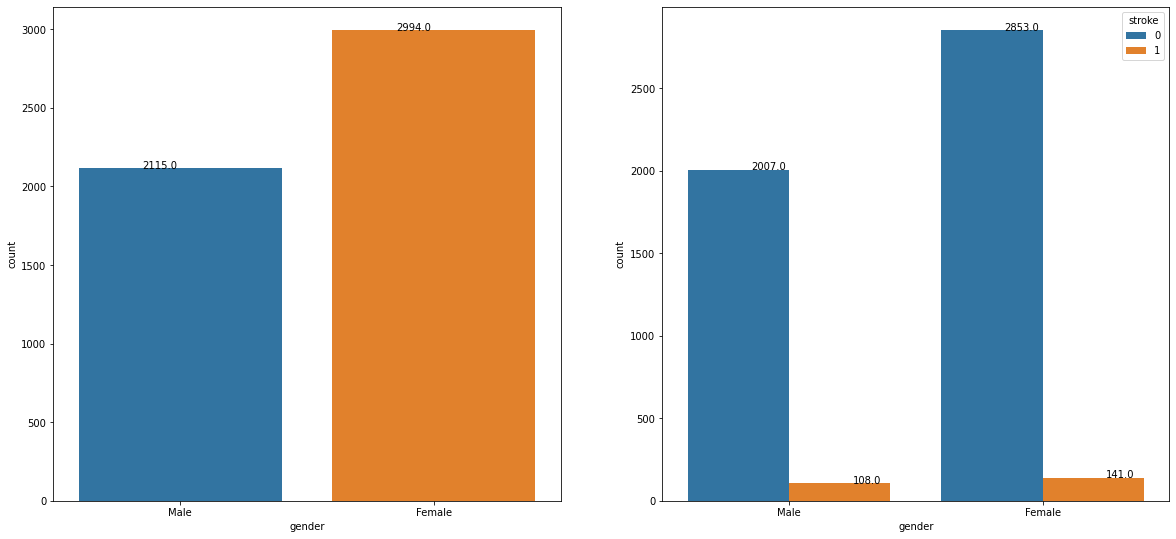

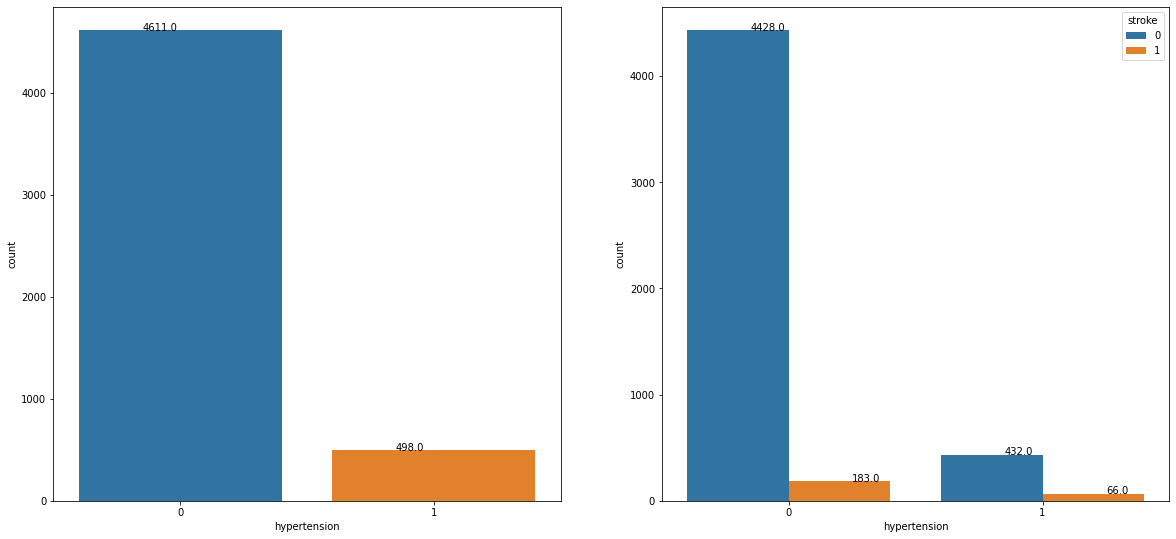

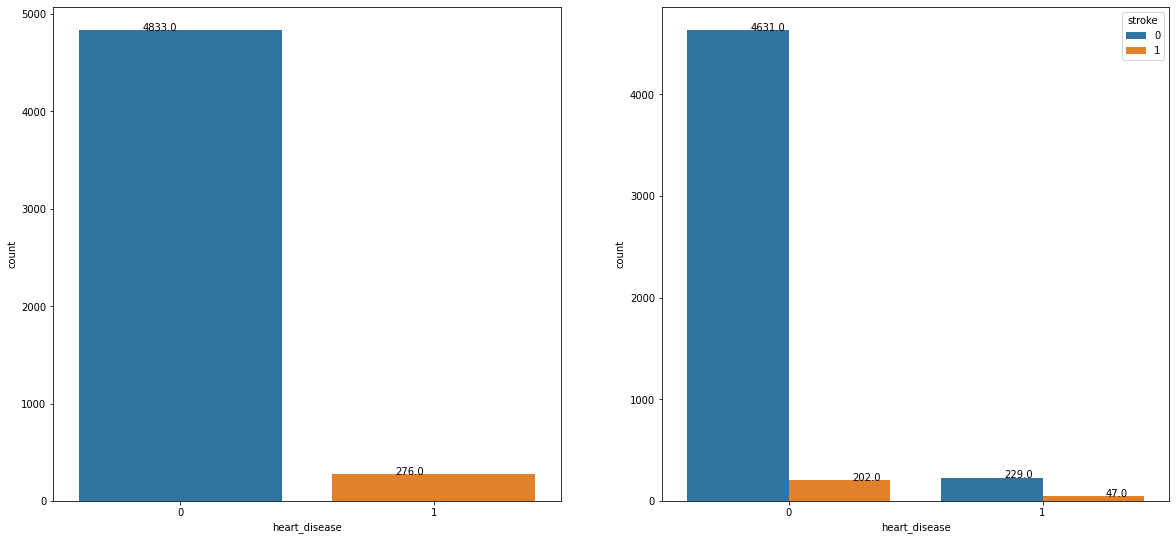

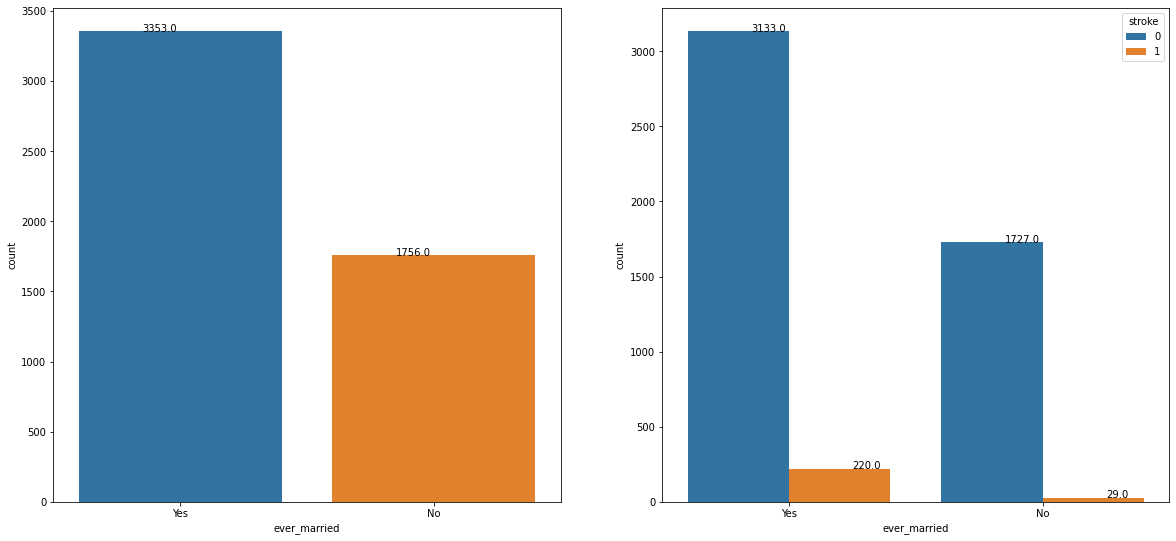

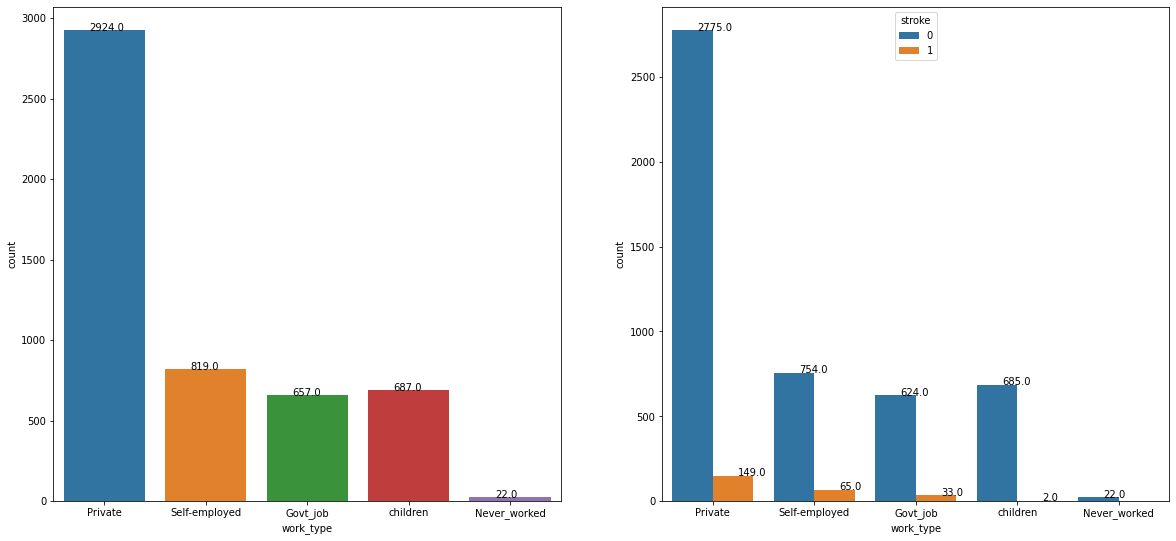

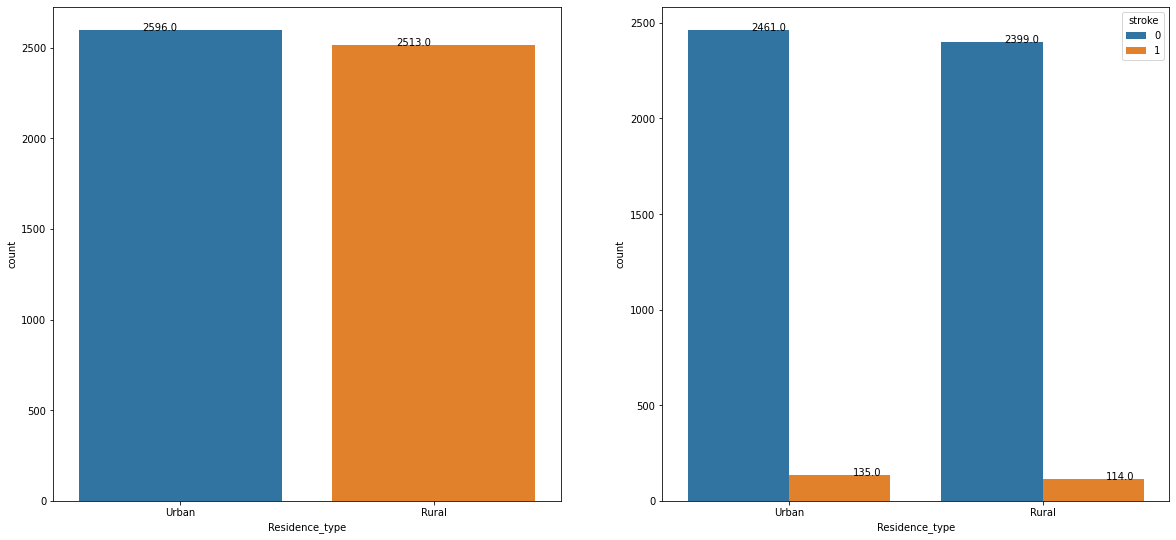

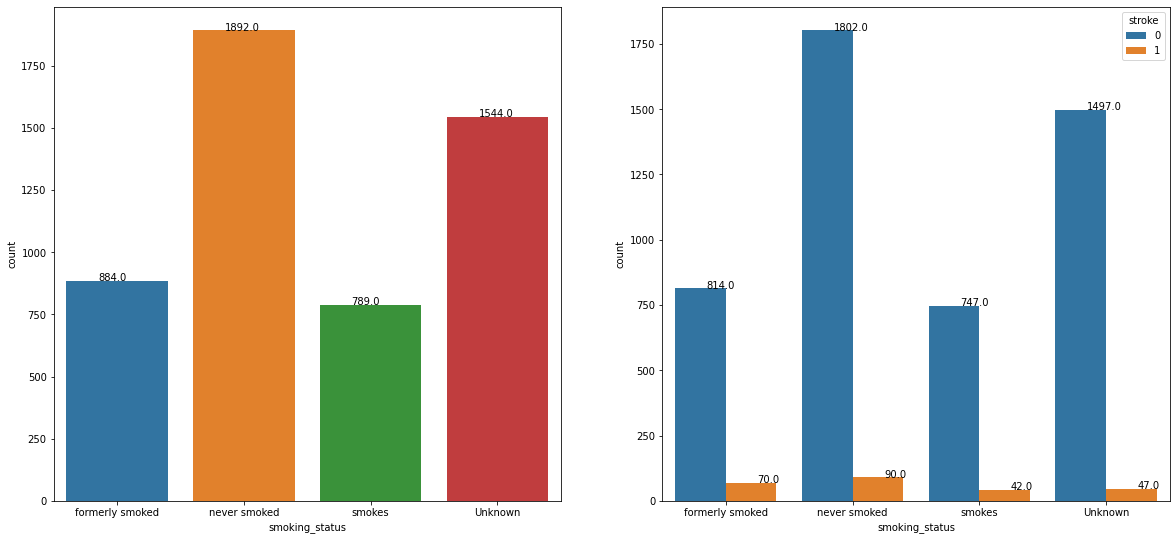

In [ ]:
for feature in categorical_feature:
   plt.figure(figsize=(20,20))
   plt.subplot(2,2,1)
   ax=sns.countplot(df[feature],data=df)
   for p in ax.patches:
     ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

   plt.subplot(2,2,2)
   az=sns.countplot(df[feature],hue='stroke',data=df)
   for p in az.patches:
     az.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [ ]:
print("{:.2f}% males got stroke while {:.2f}% female got stroke".format(((108/2007)*100),(141/2853)*100))
print("{:.2f}% who didnt have hypertension had stroke while {:.2f}% those who had hypertension met with stroke".format(((183/4428)*100),(66/432)*100))
print("{:.2f}% who didnt have heart_disease met with stroke while {:.2f}% who had heart_disease met with stroke".format(((202/4631)*100),(47/229)*100))
print("{:.2f}% who had married met with a stroke while {:.2f}% who didnt marry met with stroke".format(((220/3133)*100),(29/1727)*100))
print("{:.2f}% who worked in private sector, {:.2f}% self_employed, {:.2f}% Govt_job, {:.2f}% Children, {:.2f}% Never worked - all had met with stroke".format((149/2775)*100,(65/754)*100,(33/624)*100,(2/685)*100,(0/22)*100))
print("{:.2f}% who were in urban area had met with stroke while {:.2f}% in rural areas had met with stroke".format((135/2461)*100,(114/2399)*100))
print("{:.2f}% who formerly_smoked, {:.2f}% never_smoked, {:.2f}% who smoked, {:.2f}% whose status of smoking is unknown - all had met with stroke".format((70/814)*100,(90/1802)*100,(42/747)*100,(47/1497)*100))


5.38% males got stroke while 4.94% female got stroke
4.13% who didnt have hypertension had stroke while 15.28% those who had hypertension met with stroke
4.36% who didnt have heart_disease met with stroke while 20.52% who had heart_disease met with stroke
7.02% who had married met with a stroke while 1.68% who didnt marry met with stroke
5.37% who worked in private sector, 8.62% self_employed, 5.29% Govt_job, 0.29% Children, 0.00% Never worked - all had met with stroke
5.49% who were in urban area had met with stroke while 4.75% in rural areas had met with stroke
8.60% who formerly_smoked, 4.99% never_smoked, 5.62% who smoked, 3.14% whose status of smoking is unknown - all had met with stroke


###**3.2) Numerical features**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 608.0+ KB


In [ ]:
numerical_feature=['age','avg_glucose_level','bmi']

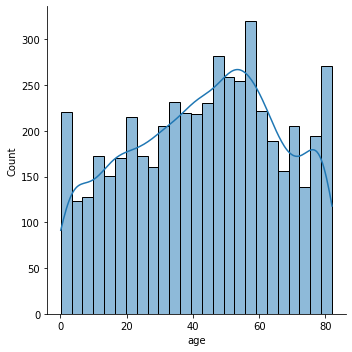

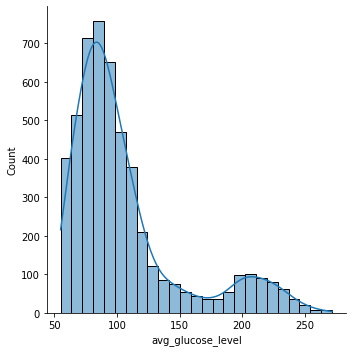

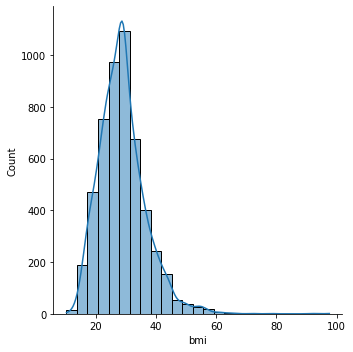

In [ ]:
for feature in numerical_feature:
  sns.displot(df[feature],kde=True,bins=25)

###Observation:
1) Age looks close to gaussian distributed

2) Avg_glucose and bmi is right skewed , we might be having huge outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


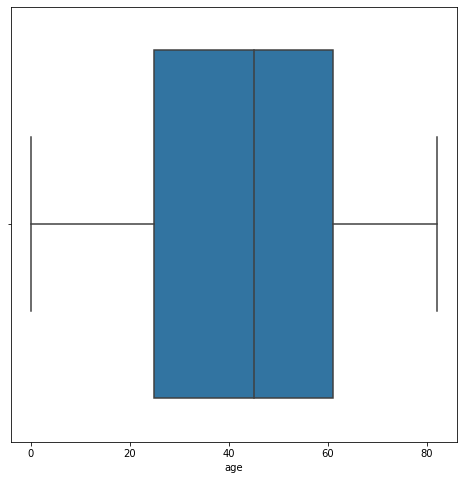

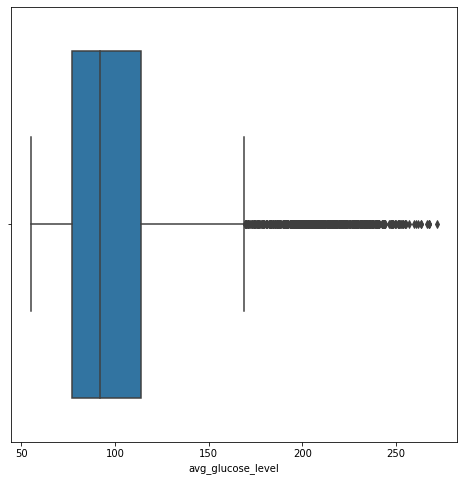

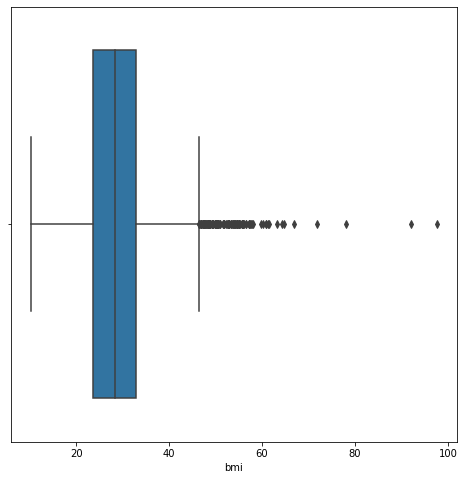

In [ ]:
for feature in numerical_feature:
  plt.figure(figsize=(8,8))
  sns.boxplot(df[feature])

##**log transforming skewed data**
By log transforming the skewed data we tend to make it close to gaussian distribution , which we can see from the below plots

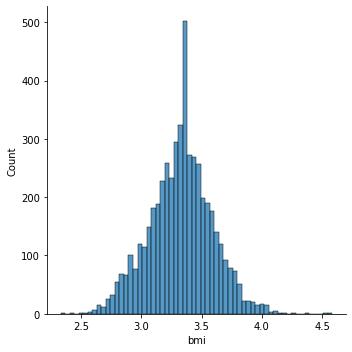

In [ ]:
df['bmi']=np.log(df['bmi'])
sns.displot(df['bmi'])

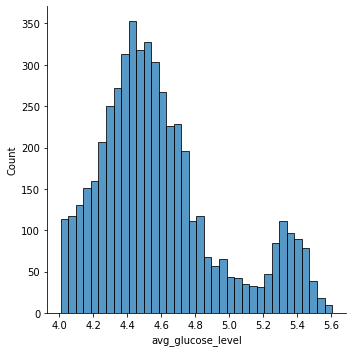

In [ ]:
df['avg_glucose_level']=np.log(df['avg_glucose_level'])
sns.displot(df['avg_glucose_level'])

Now lets check co-relation among numerical data using pairplots and heatmaps

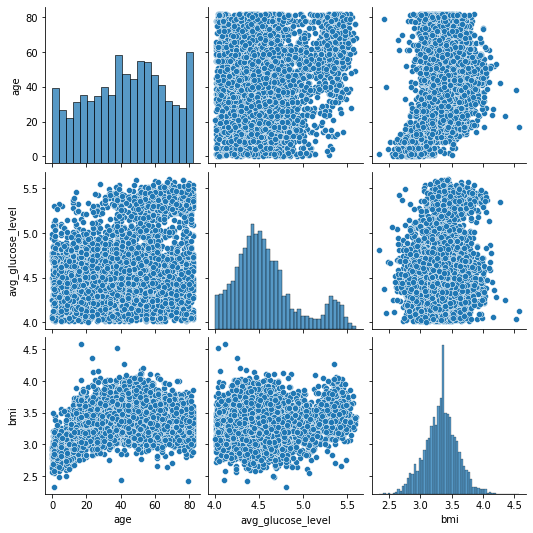

In [ ]:
sns.pairplot(df[numerical_feature])

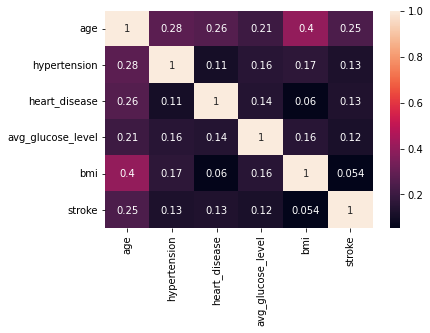

In [ ]:
sns.heatmap(df.corr(),annot=True)

-----We dont see any major corelation among the independent features------

#**4) Feature Engineering**

###**4.1) Encoding Categorical Feature**


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
categorical_fea=[feature for feature in df.columns if df[feature].dtypes=='object']
df[categorical_fea]

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [ ]:
for feature in categorical_fea:
  df[feature]=encoder.fit_transform(df[feature])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,5.432367,3.600048,1,1
1,0,61.0,0,0,1,3,0,5.309307,3.374169,2,1
2,1,80.0,0,1,1,2,0,4.662684,3.481240,2,1
3,0,49.0,0,0,1,2,1,5.143008,3.538057,3,1
4,0,79.0,1,0,1,3,0,5.159745,3.178054,2,1


###Lets define our independent and dependent features

In [ ]:
X=df.drop(['stroke'],axis=1)
y=df['stroke']

###**4.2) We are going to use the method known as Over Sampling** 

In [ ]:
from imblearn.over_sampling import RandomOverSampler
OS=RandomOverSampler()
from collections import Counter
X_os,y_os=OS.fit_resample(X,y)

In [ ]:
print('the number of classes before fit{}'.format(Counter(y)))
print('the number of classes before fit{}'.format(Counter(y_os)))

the number of classes before fitCounter({0: 4860, 1: 249})
the number of classes before fitCounter({1: 4860, 0: 4860})


We can clearly observe above that , we have equal amount of stroke and no stroke data

###**4.3) Lets proceed by creating train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=0.33,random_state=10)

###**4.4) We will scale the data before using our algorithm**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#**5) Time to apply logistic Regression algorithm**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
log_class=LogisticRegression()


In [ ]:
grid={'C':10.0**np.arange(0,10)}
cv=KFold(n_splits=5,shuffle=False,random_state=None) 

In [ ]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro') 
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08, 1.e+09])},
             scoring='f1_macro')

In [ ]:
y_pred=clf.predict(X_test_scaled)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1217  416]
 [ 350 1225]]
0.7612219451371571
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1633
           1       0.75      0.78      0.76      1575

    accuracy                           0.76      3208
   macro avg       0.76      0.76      0.76      3208
weighted avg       0.76      0.76      0.76      3208



#**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [ ]:
y_predRFC=classifier.predict(X_test_scaled)
print(confusion_matrix(y_test,y_predRFC))
print(accuracy_score(y_test,y_predRFC))
print(classification_report(y_test,y_predRFC))

[[1609   24]
 [   0 1575]]
0.9925187032418953
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1633
           1       0.98      1.00      0.99      1575

    accuracy                           0.99      3208
   macro avg       0.99      0.99      0.99      3208
weighted avg       0.99      0.99      0.99      3208

